<H2> Tugas</H2>

1. Load Data
2. Scanning data(drop kolom NA)
3. Rubah data Kategorikal ke bentuk dummies. cek di 2 tugas sebelumnya
4. Variabel Attrition dibikin dummy jika Yes jadi 1 dan No jadi 0 (Optional)
5. Bikin matrix kolerasi menggunakan heatmap lalu pilih beberapa variabel sebagai predictor
6. Training sizenya 0.1 (10%)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Jawaban No 1 dan 2

In [2]:
data = pd.read_csv('LogReg.csv').dropna()
data = data.drop('StandardHours',axis=1)
data = data.drop('EmployeeID',axis=1)

## Jawaban No 3 dan 4

In [3]:
data = data.join(pd.get_dummies(data.BusinessTravel,dtype=float)).drop(['BusinessTravel'],axis=1)
data = data.join(pd.get_dummies(data.Department,dtype=float)).drop(['Department'],axis=1)
data = data.join(pd.get_dummies(data.Gender,dtype=float)).drop(['Gender'],axis=1)
data = data.join(pd.get_dummies(data.MaritalStatus,dtype=float)).drop(['MaritalStatus'],axis=1)
# data = data.join(pd.get_dummies(data,columns=['BusinessTravel','Department','Gender','MaritalStatus'],dtype=float)).drop(['BusinessTravel','Department','Gender','MaritalStatus'],axis=1)
data['Attrition'].replace(['Yes','No'],[1,0],inplace = True)
data


,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,JobLevel,...,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Female,Male,Divorced,Married,Single
0,0,3.0,4.0,2.0,3,3,51,6,2,1,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,3.0,2.0,4.0,2,4,31,10,1,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,2.0,2.0,1.0,3,3,32,17,4,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,4.0,4.0,3.0,2,3,38,2,5,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,4.0,1.0,3.0,3,3,32,10,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,3.0,4.0,3.0,2,3,29,4,3,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4405,0,4.0,1.0,3.0,3,3,42,5,4,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4406,0,4.0,4.0,3.0,2,3,29,2,4,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4407,0,1.0,3.0,3.0,3,4,25,25,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Jawaban No 5

<Axes: >

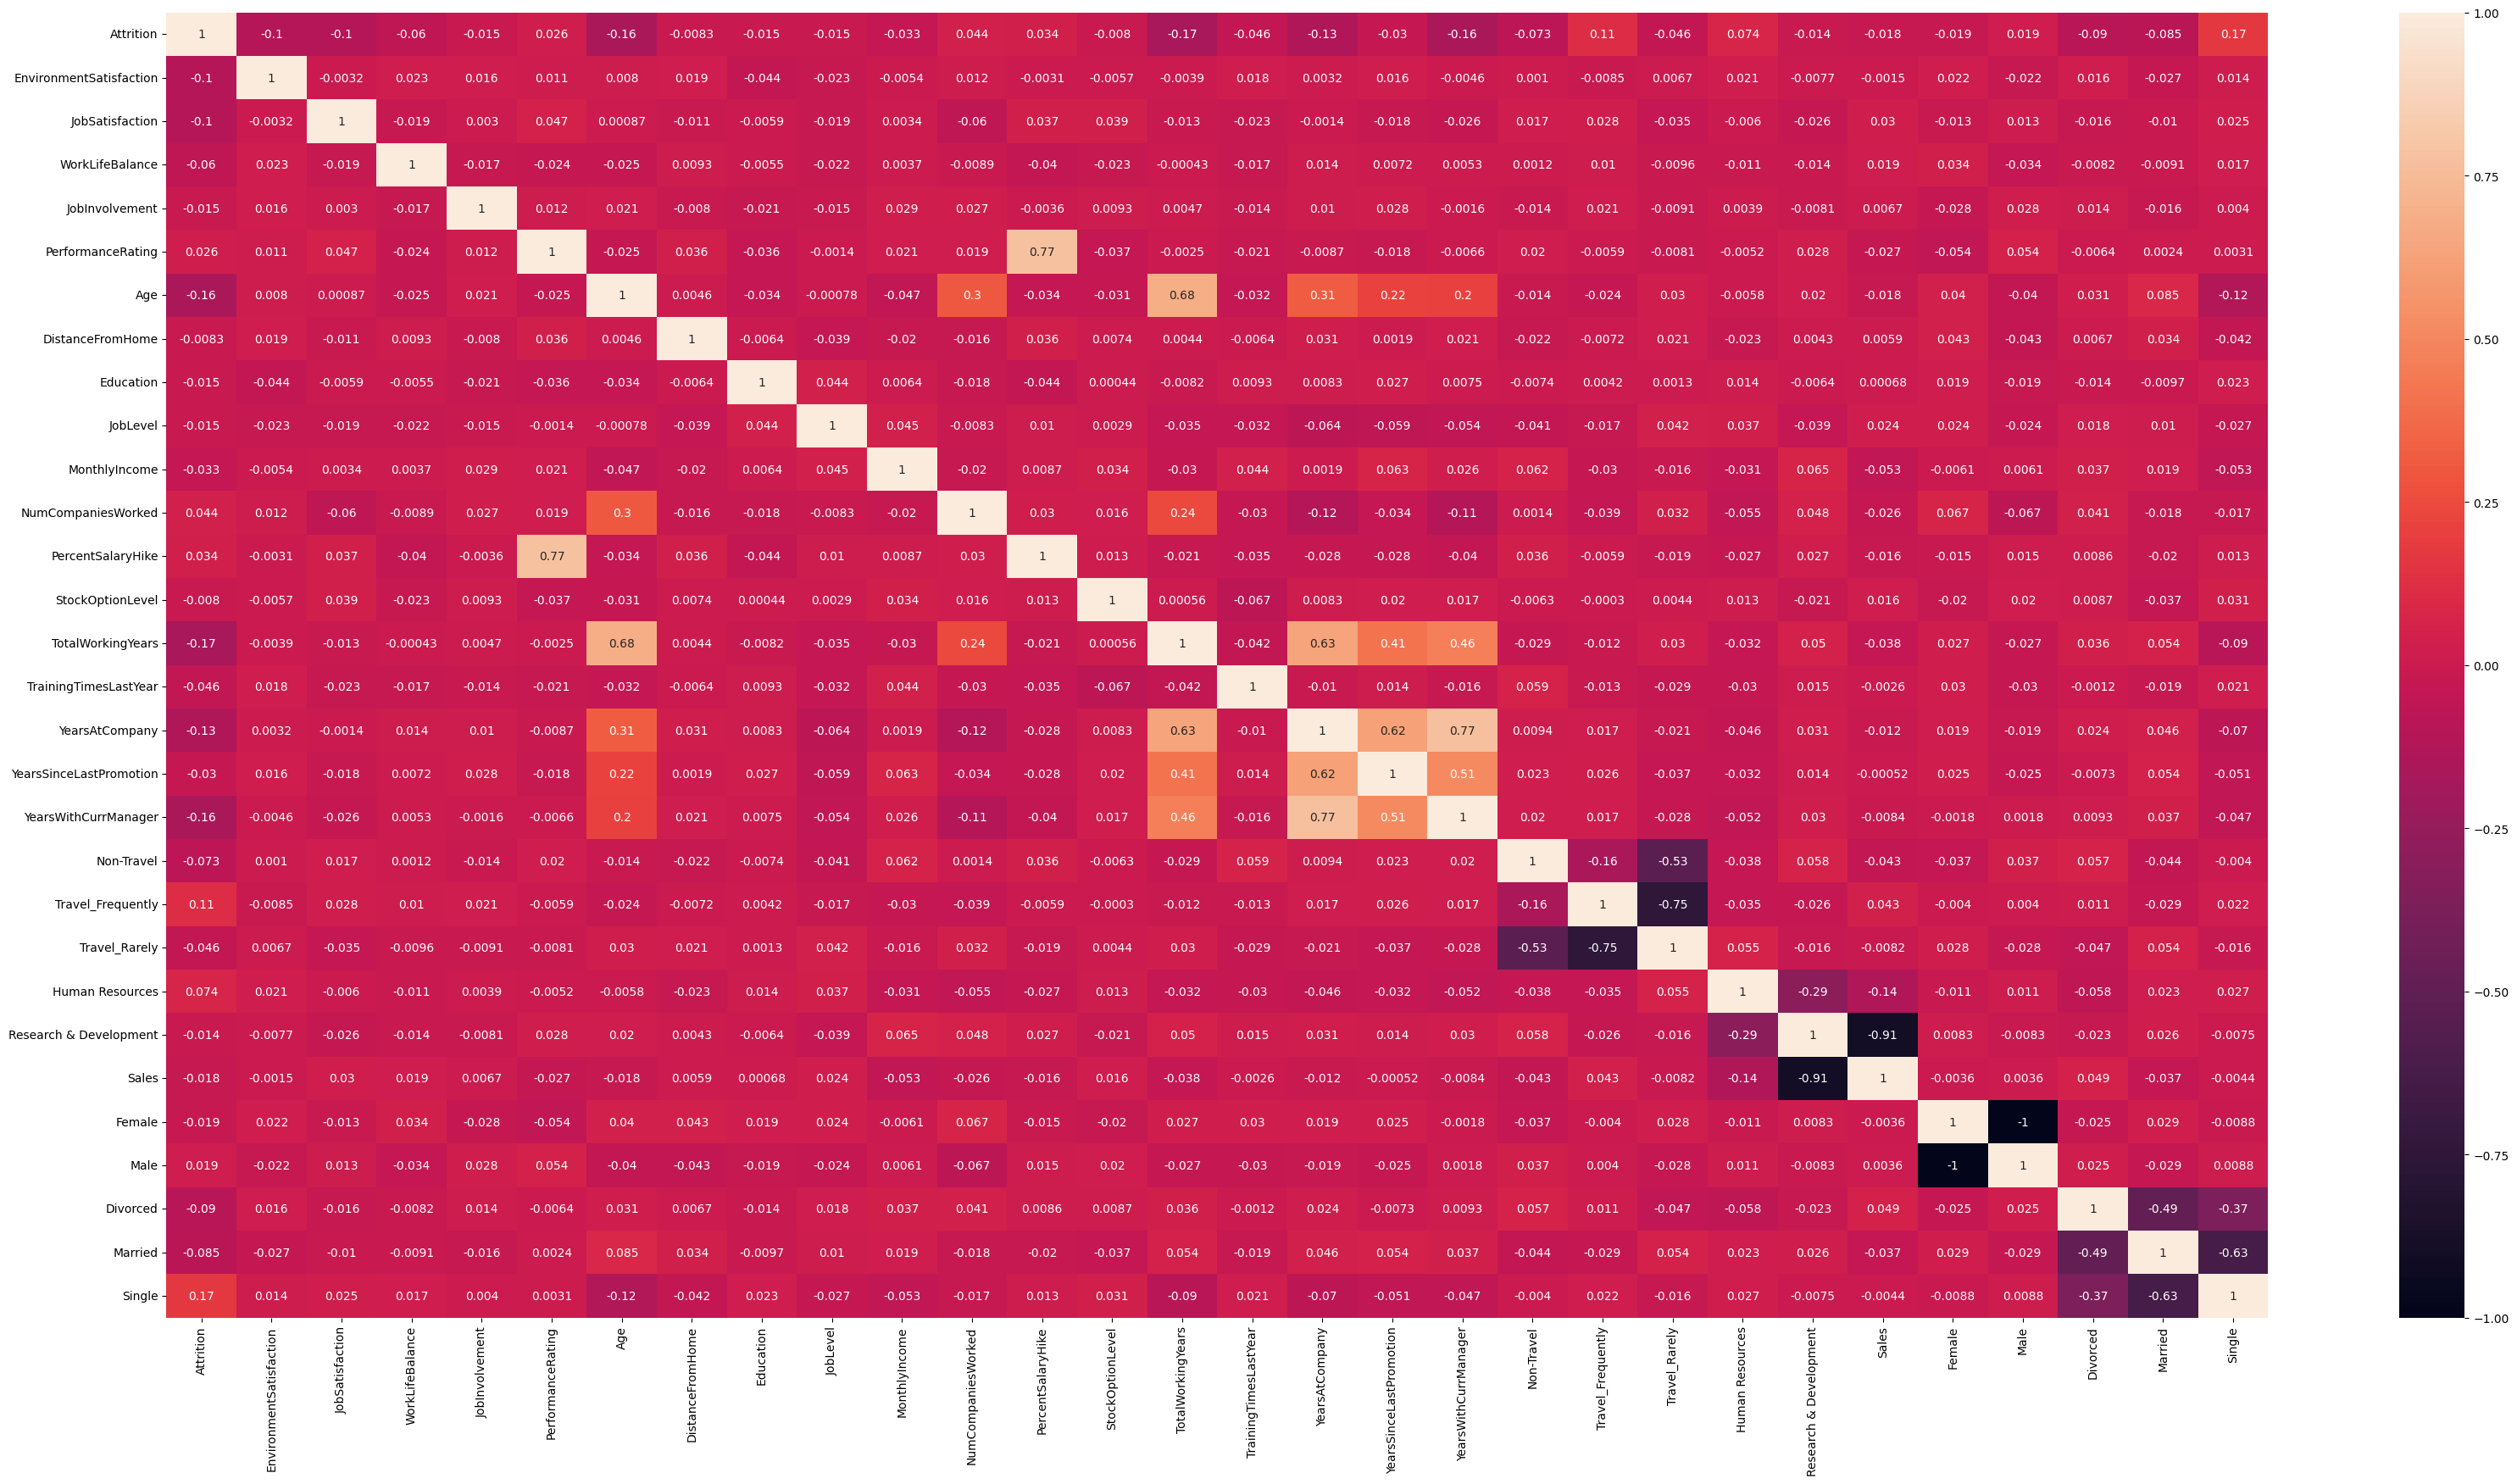

In [4]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(),annot = True)

<h3>Highest Heatmap value</h3>
<ul>
    <li>age = 0.16</li>
    <li>totalworkingyears = 0.17</li>
    <li>single = 0.17</li>
</ul>

## Jawaban No 6

In [5]:
data.corr().sort_values('Attrition',ascending = False)

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,JobLevel,...,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Female,Male,Divorced,Married,Single
Attrition,1.000000,-0.103485,-0.103098,-0.059817,-0.014705,0.026262,-0.155584,-0.008314,-0.015237,-0.014587,...,0.110314,-0.046100,0.074338,-0.014185,-0.018196,-0.018624,0.018624,-0.090465,-0.085269,0.171303
Single,0.171303,0.013886,0.025406,0.016938,0.004027,0.003086,-0.117780,-0.042410,0.022783,-0.027255,...,0.021649,-0.015990,0.027466,-0.007486,-0.004400,-0.008828,0.008828,-0.366233,-0.632504,1.000000
Travel_Frequently,0.110314,-0.008530,0.027852,0.010274,0.021242,-0.005850,-0.023939,-0.007211,0.004167,-0.016770,...,1.000000,-0.752383,-0.035083,-0.026382,0.042823,-0.003997,0.003997,0.010697,-0.029198,0.021649
Human Resources,0.074338,0.021265,-0.006048,-0.010623,0.003919,-0.005180,-0.005802,-0.023271,0.013538,0.036720,...,-0.035083,0.055466,1.000000,-0.291552,-0.140510,-0.011166,0.011166,-0.058024,0.022553,0.027466
NumCompaniesWorked,0.043911,0.012443,-0.059525,-0.008871,0.026559,0.018649,0.303709,-0.016336,-0.018156,-0.008314,...,-0.038679,0.032395,-0.054669,0.048383,-0.025899,0.067281,-0.067281,0.041390,-0.018071,-0.017477
PercentSalaryHike,0.034425,-0.003072,0.036671,-0.040252,-0.003603,0.773902,-0.034313,0.035857,-0.043592,0.010119,...,-0.005923,-0.018860,-0.027216,0.027152,-0.016067,-0.014673,0.014673,0.008582,-0.019738,0.013436
PerformanceRating,0.026262,0.011043,0.047449,-0.023573,0.012249,1.000000,-0.025059,0.035974,-0.035579,-0.001362,...,-0.005850,-0.008108,-0.005180,0.028224,-0.026922,-0.054126,0.054126,-0.006373,0.002413,0.003086
Male,0.018624,-0.022241,0.013485,-0.034145,0.028136,0.054126,-0.040051,-0.043224,-0.018506,-0.023660,...,0.003997,-0.028432,0.011166,-0.008294,0.003646,-1.000000,1.000000,0.024688,-0.028825,0.008828
StockOptionLevel,-0.007971,-0.005711,0.038806,-0.022785,0.009347,-0.037390,-0.030608,0.007376,0.000443,0.002940,...,-0.000305,0.004436,0.013482,-0.020917,0.015687,-0.019539,0.019539,0.008682,-0.036668,0.031408
DistanceFromHome,-0.008314,0.018882,-0.011494,0.009345,-0.007972,0.035974,0.004621,1.000000,-0.006369,-0.038576,...,-0.007211,0.021082,-0.023271,0.004252,0.005891,0.043224,-0.043224,0.006731,0.034150,-0.042410


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
LogisticReg = LogisticRegression()
logistic_data = data.loc[:,['Single','TotalWorkingYears','Attrition','Age','YearsAtCompany','Travel_Frequently','YearsWithCurrManager','EnvironmentSatisfaction']]
x = logistic_data.drop('Attrition',axis = 1)
y = logistic_data['Attrition']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [8]:
LogisticReg.fit(x_train,y_train)
score = LogisticReg.score(x_test,y_test)
print(score)
LogisticReg.coef_

0.8511627906976744


array([[ 0.81156705, -0.0391429 , -0.01731161,  0.03560459,  0.71586862,
        -0.14584132, -0.29512602]])

<p>Berdasarkan hasil perhitungan coefficiency diatas dapat disimpulkan bahwa variabel Single memiliki pengaruh paling besar terhadap nilai dari variabel Attrition</p>

In [9]:
prediction = LogisticReg.predict(x_test)
print(prediction)

data_new = x_test.join(y_test)
data_new['Prediction'] = prediction
relevant_value = data_new.loc[data['Attrition'] == 1]
relevant_value
# data['Attrition'].value_counts

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Single,TotalWorkingYears,Age,YearsAtCompany,Travel_Frequently,YearsWithCurrManager,EnvironmentSatisfaction,Attrition,Prediction
2008,0.0,7.0,25,7,0.0,6,4.0,1,0
1575,1.0,1.0,33,1,0.0,0,4.0,1,0
2001,0.0,24.0,44,20,0.0,6,2.0,1,0
913,1.0,10.0,40,4,0.0,3,1.0,1,0
3458,1.0,2.0,20,2,1.0,2,4.0,1,0
...,...,...,...,...,...,...,...,...,...
3883,1.0,5.0,23,5,0.0,2,4.0,1,0
2708,1.0,10.0,32,10,1.0,7,2.0,1,0
2398,1.0,13.0,35,11,1.0,7,4.0,1,0
2921,1.0,4.0,32,3,0.0,2,4.0,1,0


In [ ]:
PR 

Ulangi proses diatas tetapi tidak boleh memakai 1 variabel. hapus variabel yang tidak dibutuhkan(EmployeeID,StandardHours)
tidak perlu pakai heatmap. datasetnya bebas dan jumlah datanya tidak boleh dibawah 10rb